### 1. Introdução e Coleta de Dados

#### Fonte dos Dados
Este projeto utiliza o **Spotify Tracks Dataset**, disponibilizado publicamente na plataforma Kaggle por Maharshi Pandya. O conjunto de dados contém características de áudio de faixas do Spotify em 125 gêneros diferentes.

* **Fonte Original:** Kaggle
* **Autor:** Maharshi Pandya
* **Link:** [Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

#### Licença
O dataset está licenciado sob a **Community Data License Agreement - Sharing - Version 1.0 (CDLA-Sharing-1.0)** ou similar (Kaggle Open Data), permitindo uso, modificação e compartilhamento para fins acadêmicos e de análise.

#### Variável-Alvo (Target)
Para as análises de regressão linear (simples, múltipla e polinomial), a variável dependente escolhida será:
* **`popularity`**: Um valor inteiro de 0 a 100 que representa a popularidade da faixa no Spotify.

#### Hipóteses de Negócio
Buscamos entender quais características musicais influenciam o sucesso de uma música.
1.  **H1:** Músicas mais "dançantes" (`danceability`) tendem a ter maior popularidade.
2.  **H2:** Músicas com maior energia (`energy`) e volume (`loudness`) são preferidas pelo público atual.
3.  **H3:** A duração da música (`duration_ms`) tem uma correlação não-linear com a popularidade (muito curtas ou muito longas podem ser menos populares).

##### Import das Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##### Instanciando o dataset

In [2]:
df = pd.read_csv("..\\data\\raw\\dataset.csv")

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


##### Renomeando as colunas

In [4]:
df = df.rename(columns={
    "Unnamed: 0": "id",
    "track_id": "id_musica",
    "artists": "artistas",
    "album_name": "album",
    "track_name": "musica",
    "popularity": "popularidade",
    "duration_ms": "duracao_ms",
    "explicit": "explicita",
    "danceability": "dancabilidade",
    "energy": "energia",
    "key": "tom",
    "loudness": "volume",
    "mode": "modo",
    "speechiness": "falada",
    "acousticness": "acustica",
    "instrumentalness": "instrumental",
    "liveness": "ao_vivo",
    "valence": "valencia",
    "tempo": "tempo_bpm",
    "time_signature": "compasso",
    "track_genre": "genero"
})


##### Mudamos essa coluna booleana pra int, para ficar com os valores 0 e 1


In [5]:
df["explicita"] = df["explicita"].astype(int)


##### Drop na coluna track_id

In [6]:
df.drop(columns="id_musica", inplace=True)

In [7]:
df.head()

,id,artistas,album,musica,popularidade,duracao_ms,explicita,dancabilidade,energia,tom,volume,modo,falada,acustica,instrumental,ao_vivo,valencia,tempo_bpm,compasso,genero
0,0,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


##### Dropando valores nulos

<p> haviam apenas três linhas com valores nulos, então dropá-las não vai afetar os resultados do nosso modelo
</p>

In [8]:
df.dropna(subset=["artistas", "album", "musica"], inplace=True)



In [9]:
df.isna().sum()

id               0
artistas         0
album            0
musica           0
popularidade     0
duracao_ms       0
explicita        0
dancabilidade    0
energia          0
tom              0
volume           0
modo             0
falada           0
acustica         0
instrumental     0
ao_vivo          0
valencia         0
tempo_bpm        0
compasso         0
genero           0
dtype: int64

In [ ]:
df.to_csv("../data/processed/dataset_limpo.csv", index=False)


##### Plotagem de Gráficos e Insights

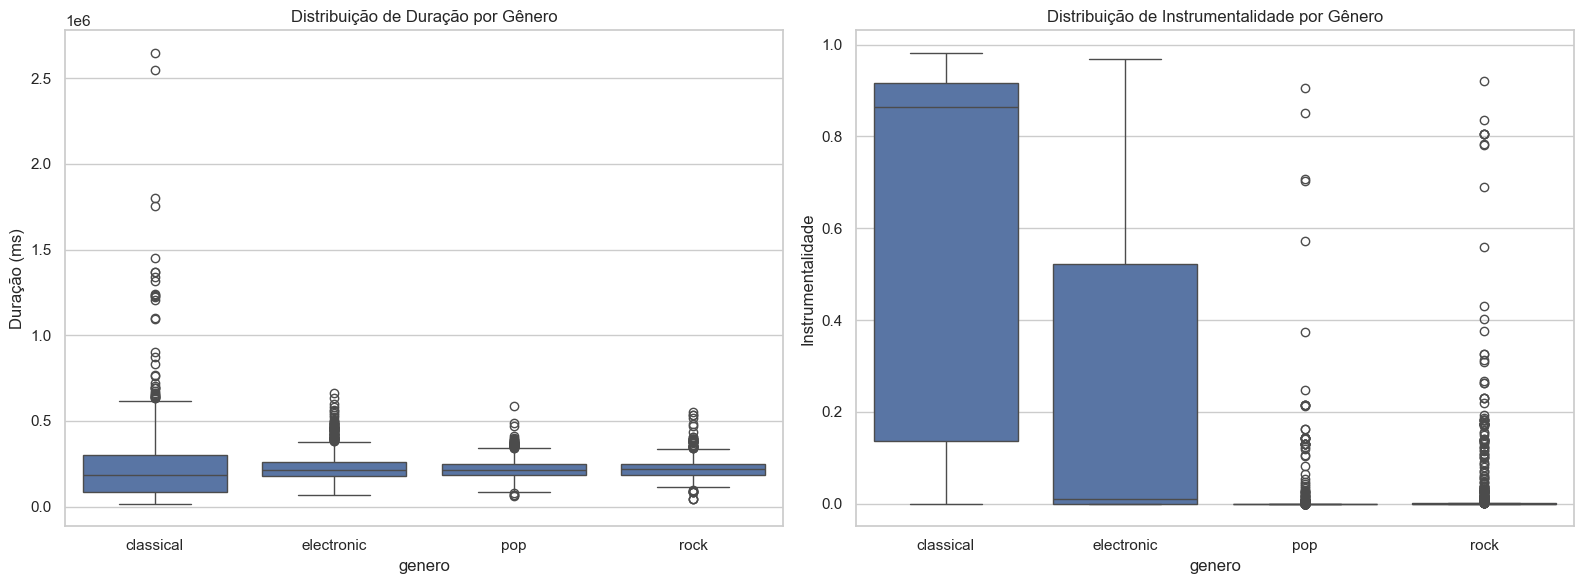

In [10]:
# Selecionando alguns gêneros contrastantes para exemplificar o contexto
generos_exemplo = ['classical', 'pop', 'electronic', 'rock']
df_contexto = df[df['genero'].isin(generos_exemplo)]

# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Criando uma figura com 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Duração por Gênero
sns.boxplot(x='genero', y='duracao_ms', data=df_contexto, ax=axes[0])
axes[0].set_title('Distribuição de Duração por Gênero')
axes[0].set_ylabel('Duração (ms)')

# Gráfico 2: Instrumentalidade por Gênero
sns.boxplot(x='genero', y='instrumental', data=df_contexto, ax=axes[1])
axes[1].set_title('Distribuição de Instrumentalidade por Gênero')
axes[1].set_ylabel('Instrumentalidade')

plt.tight_layout()
plt.savefig('contexto_outliers_genero.png')


#### Boxplot 

 Duração (duracao_ms): O gênero Classical tem uma variação enorme (desvio padrão muito maior), com músicas curtíssimas e outras muito longas (até ~2,6 milhões de ms!). Já o Pop e Rock são muito mais "comportados". Se aplicássemos uma regra geral de corte, poderíamos apagar obras clássicas legítimas achando que são erros.

 Instrumentalidade (instrumental): Para Pop e Rock, qualquer valor alto é um outlier (a maioria está no zero). Mas para Classical, ter valores altos é o padrão. Cortar outliers gerais aqui destruiria a categoria de música clássica.

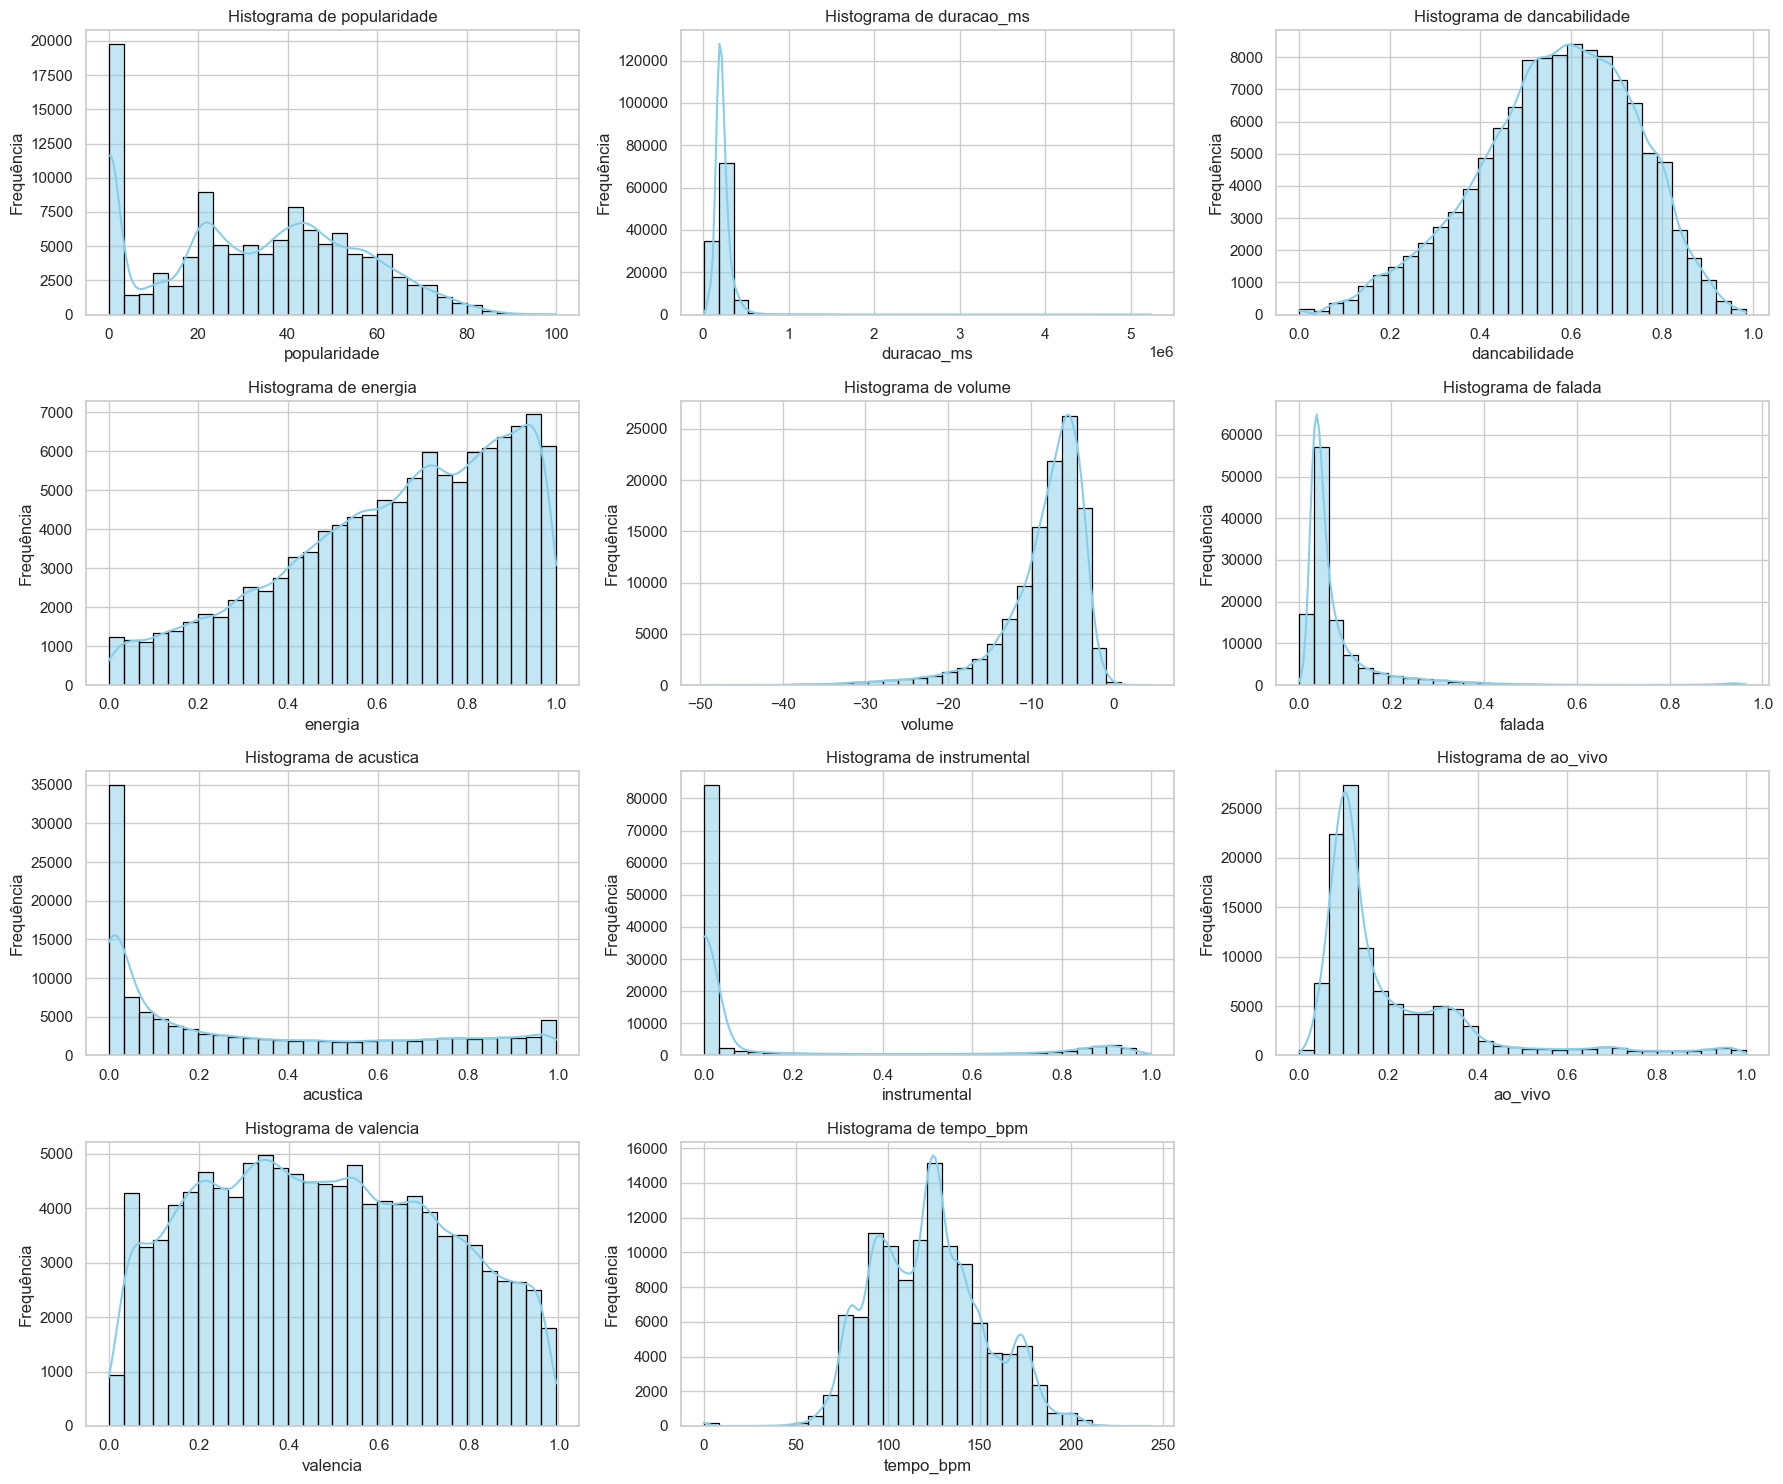

In [11]:
# Selecionar colunas numéricas de interesse
cols_numericas = ['popularidade', 'duracao_ms', 'dancabilidade', 'energia', 'volume', 
                  'falada', 'acustica', 'instrumental', 'ao_vivo', 'valencia', 'tempo_bpm']

# Configurar o tamanho da figura (canvas)
plt.figure(figsize=(18, 15))

# Loop para criar um histograma para cada coluna
for i, col in enumerate(cols_numericas):
    plt.subplot(4, 3, i + 1) # Cria uma grade de 4 linhas x 3 colunas
    # kde=True adiciona a linha suave da estimativa de densidade
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

#### Histogramas

- Instrumental (instrumental): 
Veja como a barra está gigante no zero e tem uma cauda longa para a direita. Isso confirma que a maioria das músicas não é instrumental, e as que são instrumentais (valores altos) são os outliers nesse contexto global.

- Duração (duracao_ms): 
Parece uma curva de sino ("normal"), mas bem "espremida", com uma cauda longa à direita (músicas muito longas).

- Popularidade: 
Tem um pico estranho no zero. Isso pode indicar músicas sem dados de popularidade ou músicas muito obscuras que foram atribuídas como 0. Vale a pena investigar se esses "zeros" são reais ou dados faltantes preenchidos.

- Energia e Valência: 
Têm distribuições mais espalhadas e uniformes, o que é saudável para análise.

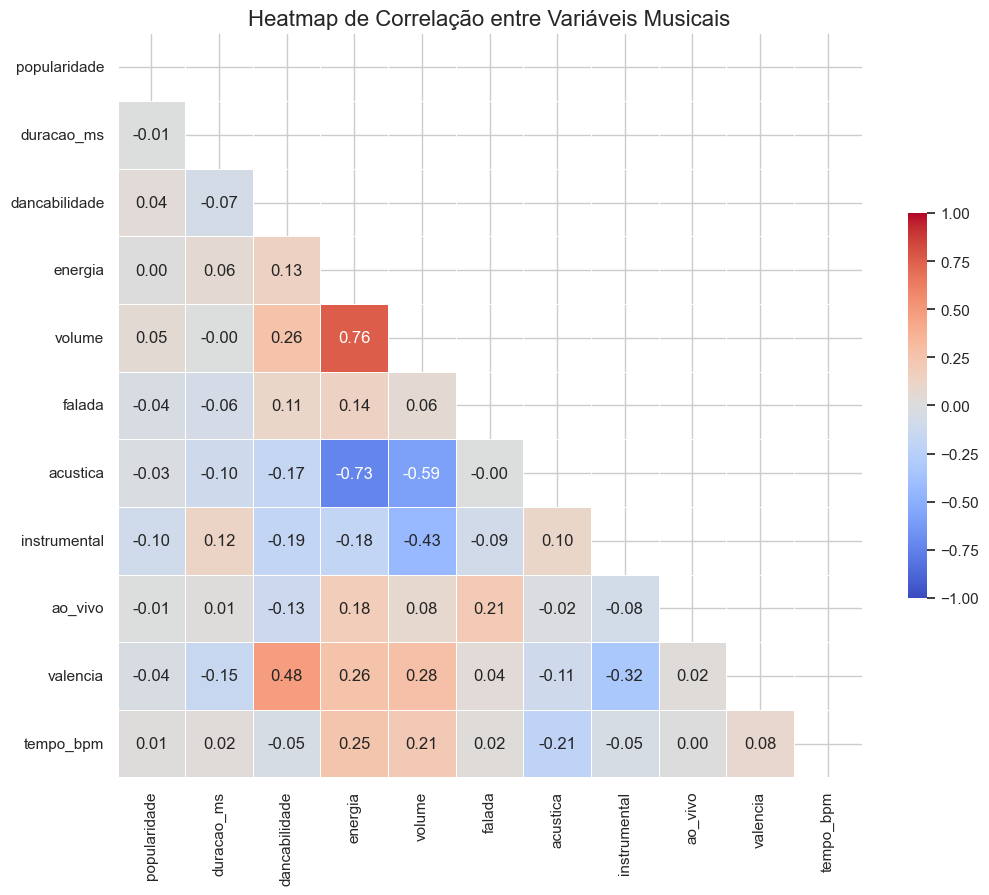

In [13]:
# Calculate correlation matrix
corr_matrix = df[cols_numericas].corr()

# Create a mask for the upper triangle (optional but makes it cleaner)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Heatmap de Correlação entre Variáveis Musicais', fontsize=16)
plt.savefig('heatmap_correlacao.png')

#### HEATMAP

- Energia vs. Volume (0.76 - Forte Positiva):

    Como esperado, músicas com mais energia tendem a ser mais altas (volume maior). É a correlação mais forte do dataset.

- Energia vs. Acústica (-0.73 - Forte Negativa):

    Músicas acústicas tendem a ter menos energia. Isso faz sentido, já que o parâmetro "energia" do Spotify mede intensidade e atividade.

- Volume vs. Acústica (-0.59 - Negativa):

    Similar ao ponto anterior: músicas acústicas costumam ser mais "silenciosas" ou menos comprimidas sonoramente que faixas eletrônicas ou pop moderno.

- Dancabilidade vs. Valência (0.48 - Moderada Positiva):

    "Valência" mede o quão positiva/feliz a música soa. Músicas mais "dançáveis" tendem a ser mais alegres.

- Popularidade:

    Surpreendentemente, a popularidade não tem correlação muito forte com nenhuma característica específica isolada (todas as cores na linha popularidade são bem fracas/claras). Isso sugere que não existe uma "fórmula mágica" única (como "ser rápida" ou "ser alta") para uma música ser popular; depende de uma combinação complexa ou de fatores externos (marketing, artista).

- Instrumentalidade vs. Volume (-0.43):

    Faixas instrumentais tendem a ter volumes mais baixos (provavelmente devido à presença de música clássica ou ambiente no dataset).